In [3]:
import numpy as np
from preprocessing import LDA
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
data_1 = [
    [4,1],
    [2,4],
    [2,3],
    [3,6],
    [4,4],
]


data_2 = [
    [9,10],
    [6,8],
    [9,5],
    [8,7],
    [10,8],
]

data=np.concatate([
    data_1,
    data_2
])

label = np.hstack((np.zeros(len(data_1)), np.ones(len(data_2))))  # 클래스 레이블 생성



In [9]:
print(data.shape)

(10, 2)


In [10]:
print(label)

[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


In [13]:
l = LDA(data)

[[ 4  1]
 [ 2  4]
 [ 2  3]
 [ 3  6]
 [ 4  4]
 [ 9 10]
 [ 6  8]
 [ 9  5]
 [ 8  7]
 [10  8]]
[5.7 5.6]


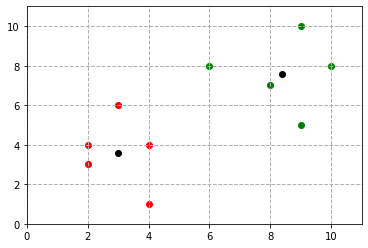

In [16]:
l.grad_show()

In [17]:
s_b = l.set_scatter_b_matrix()

값 :  [[-5.4]
 [-4. ]]


In [18]:
s_w = l.set_scatter_w_matrix()

In [19]:
result = l.get_lda(num=1)

[[0.91955932]
 [0.39295122]]


In [22]:
data.shape[1]

5

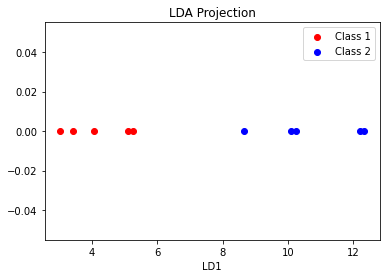

In [23]:
plt.scatter(result[0], np.zeros(data.shape[1]), color='r', label='Class 1')
plt.scatter(result[1], np.zeros(data.shape[1]), color='b', label='Class 2')
plt.legend()
plt.title('LDA Projection')
plt.xlabel('LD1')
plt.show()

# Multi Classifier

In [1]:
data_1 = [
    [4,1],
    [2,4],
    [2,3],
    [3,6],
    [4,4],
]


data_2 = [
    [9,10],
    [7,8],
    [9,5],
    [8,7],
    [10,8],
]

data_3 = [
    [5, 17],
    [3, 13],
    [5, 15],
    [4, 19],
    [4, 14],
]

In [3]:
x1 = np.array(data_1)
x2 = np.array(data_2)
x3 = np.array(data_3)
data = np.array([
    data_1,
    data_2,
    data_3
])
print(data.shape)


(3, 5, 2)


In [4]:
from preprocessing import LDA

l = LDA(data)

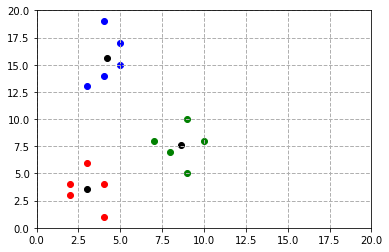

In [5]:
l.grad_show()

In [6]:
l.set_scatter_w_matrix()

array([[2.4 , 0.32],
       [0.32, 9.92]])

In [7]:
l.set_scatter_b_matrix()

array([[ 86.933334 ,   2.6666658],
       [  2.6666658, 373.33334  ]], dtype=float32)

In [8]:
result = l.get_lda(1)

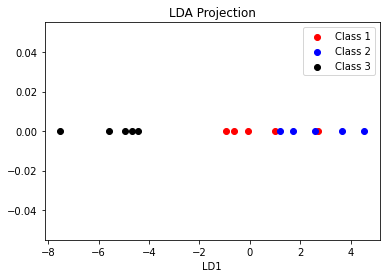

In [10]:
import matplotlib.pyplot as plt
plt.scatter(result[0], np.zeros(len(result[0])), color='r', label='Class 1')
plt.scatter(result[1], np.zeros(len(result[1])), color='b', label='Class 2')
plt.scatter(result[2], np.zeros(len(result[2])), color='k', label='Class 3')

plt.legend()
plt.title('LDA Projection')
plt.xlabel('LD1')
plt.show()

# LDA Sklearn Ex

Text(0.5, 0, 'LD1')

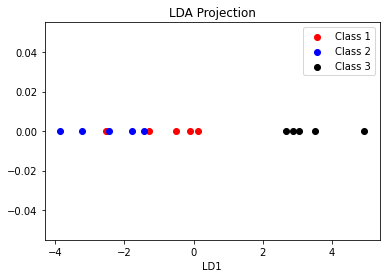

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA 모델 초기화
lda = LDA(n_components=1)  # 투영할 차원 수를 1로 설정

# 데이터에 모델 적용
x_combined = np.vstack((x1, x2, x3))
y_3 = np.zeros(len(x3)) + 2
y_combined = np.hstack((np.zeros(len(x1)), np.ones(len(x2)), y_3))  # 클래스 레이블 생성

lda.fit(x_combined, y_combined)

x_lda = lda.transform(x_combined)

# 투영된 데이터 플로팅
plt.scatter(x_lda[y_combined == 0], np.zeros(len(x1)), color='r', label='Class 1')
plt.scatter(x_lda[y_combined == 1], np.zeros(len(x2)), color='b', label='Class 2')
# 투영된 데이터 플로팅
plt.scatter(x_lda[y_combined == 2], np.zeros(len(x1)), color='k', label='Class 3')
plt.legend()
plt.title('LDA Projection')
plt.xlabel('LD1')
# plt.show()